In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/GenZ_DatingApp_Data.csv")

In [3]:
#To make a copy of The Original Copy of the Data
df = data.copy()

In [4]:
#To Generate the First Five Rows Of the Dataset
data.tail(5)

,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
495,496,23,Female,Mumbai,Undergraduate,Intern,Tinder,Hinge,Weekly,1.5 hours,Casual Dating,2,NaN,Audio Calls,Voice Notes,Personality > Interests > Values
496,497,23,Male,Mumbai,Postgraduate,Intern,OkCupid,Tinder,Daily,2 hours,Casual Fun,1,Time-Wasting,Video Calls,Video Calls,Values > Personality > Appearance
497,498,22,Male,Hyderabad,Graduate,Freelancer,NaN,Hinge,Monthly,2 hours,Casual Fun,2,Lack of Genuine Matches,Video Calls,Voice Notes,Appearance > Interests > Personality
498,499,21,Female,Kolkata,Graduate,Student,Tinder,Hinge,Daily,1.5 hours,Casual Dating,3,Lack of Genuine Matches,Detailed Profiles,Text,Appearance > Interests > Personality
499,500,22,Male,Mumbai,Graduate,Part-time Job,NaN,Hinge,Weekly,1.5 hours,Casual Fun,2,Time-Wasting,AI Recommendations,Video Calls,Appearance > Interests > Personality


In [5]:
# Check for missing values
print(df.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [6]:
#To find the percentage of mssing values (null values) in the dataset
((data.isnull().sum())/data.shape[0] ) * 100


User_ID                     0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Education                   0.0
Occupation                  0.0
Primary_App                21.4
Secondary_Apps             22.8
Usage_Frequency             0.0
Daily_Usage_Time            0.0
Reason_for_Using            0.0
Satisfaction                0.0
Challenges                 23.4
Desired_Features            0.0
Preferred_Communication     0.0
Partner_Priorities          0.0
dtype: float64

In [7]:
#Filling the Null Values with the mode since the percentage of Missing Values is not significant for the columns to be dropped
df['Primary_App'] = df['Primary_App'].fillna(df['Primary_App'].mode()[0])
df['Secondary_Apps'] = df['Secondary_Apps'].fillna(df['Secondary_Apps'].mode()[0])

In [8]:
#Filling Challenges Column With A Placholder 
df['Challenges'] = df['Challenges'].fillna('Unknown')

In [9]:
# To Standardize categorical values
df['Gender'] = df['Gender'].str.lower()

In [10]:
#To convert all object data types into categorical data types
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Location                 500 non-null    category
 4   Education                500 non-null    category
 5   Occupation               500 non-null    category
 6   Primary_App              500 non-null    category
 7   Secondary_Apps           500 non-null    category
 8   Usage_Frequency          500 non-null    category
 9   Daily_Usage_Time         500 non-null    category
 10  Reason_for_Using         500 non-null    category
 11  Satisfaction             500 non-null    int64   
 12  Challenges               500 non-null    category
 13  Desired_Features         500 non-null    category
 14  Preferred_

In [12]:
df['Satisfaction'] = df['Satisfaction'].astype('category')

In [39]:
df.drop("Satsisfaction", axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   User_ID                  500 non-null    int64   
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    object  
 3   Location                 500 non-null    object  
 4   Education                500 non-null    object  
 5   Occupation               500 non-null    object  
 6   Primary_App              500 non-null    object  
 7   Secondary_Apps           500 non-null    object  
 8   Usage_Frequency          500 non-null    object  
 9   Daily_Usage_Time         500 non-null    object  
 10  Reason_for_Using         500 non-null    object  
 11  Satisfaction             500 non-null    category
 12  Challenges               500 non-null    object  
 13  Desired_Features         500 non-null    object  
 14  Preferred_

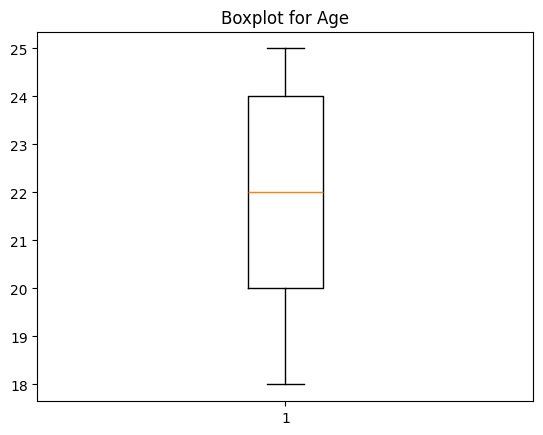

In [34]:
import matplotlib.pyplot as plt

# Plot a boxplot to identify the outliers
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()


The box plot above shows there are no outliers in the numerical column Age